In [1]:
import numpy as np
import scipy as sp
import scipy.interpolate as interp
import sys,json,os
sys.path.append('../..')
import matplotlib.pyplot as plt
import Project.profiles as pp
import Project.new_profiles as pnp
import Project.plot_assist as pa
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
from tqdm.notebook import tqdm
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['mathtext.fontset'] = 'dejavuserif'

In [2]:
dmo = json.load(open('../../sim_RC_12/Output/resdicts/dmo_sim_dict.json','r'))
for gal in dmo:
    dmo[gal]['core_fit'] = dmo[gal]['sidm_fit']
    dmo[gal]['cusp_fit'] = dmo[gal]['nfw_fit']
bry = json.load(open('../../sim_RC_12/Output/resdicts/Bry_2sig_dict.json','r'))
bry_1 = json.load(open('../../sim_RC_12/Output/resdicts/Bry_1sig_dict.json','r'))
bry_p5 = json.load(open('../../sim_RC_12/Output/resdicts/Bry_p5sig_dict.json','r'))
# sparcd = json.load(open('../../obs_RC_v4/Output/result_dicts/sparc_fit_dict.json','r'))
sparcd = json.load(open('../Output/sparc_new_dict.json','r'))

In [4]:
LM = np.zeros([15,15])
RN = np.zeros([15,15])
for lm_i in range(15):
    for rn_i in range(15):
        LM[lm_i,rn_i] = lm_i
        RN[lm_i,rn_i] = 14-rn_i
masses = np.array([9.0,9.3,9.6,9.9,10.2,10.5,10.8,11.1,11.4,11.7,12.0,12.3,12.6,12.9,13.2,13.5])
radius = np.array([0.2,0.4,0.6,0.8,1.0,1.4,1.8,2.2,2.6,3.0,3.4,3.8,4.2,4.6,5.0,5.4])
mass = 0.5*(masses[:-1]+masses[1:])
rad = 0.5*(radius[:-1]+radius[1:])
new_radius = [radius[-i-1] for i in range(len(radius))]
data = [[(1.,1.,1.) for i in range(16)] for i in range(16)]

lsig_edges = np.array([-2,-1,-0.5,0,0.5,1,1.5,2.,2.25,2.5,2.75,3.,3.5,4.,4.5,5])
lsigs = 0.5*(lsig_edges[:-1]+lsig_edges[1:])
LS = [[lsigs[i] for j in range(15)] for i in range(15)]
LS = np.array(LS)

LM_xi = sp.interpolate.interp1d(mass,np.arange(0,15,1),fill_value = (0,14),bounds_error = False)
RN_yi = sp.interpolate.interp1d(rad,np.arange(14,-1,-1),fill_value = (14,0),bounds_error = False)
LS_xi = sp.interpolate.interp1d(lsigs,np.arange(0,15,1),fill_value = (0,14),bounds_error = False)
LS_yi = sp.interpolate.interp1d(lsigs,np.arange(14,-1,-1),fill_value = (14,0),bounds_error = False)

In [5]:
Lm = np.linspace(9.,13.5,100)
lms = pnp.lmstar_behroozi_19(Lm)
sig = 1.5
lms_low = lms - sig*0.3
lmg_low = 0.52*lms_low + 4.44 - sig*0.47
lrg_low = 0.59*lmg_low - 4.80 - sig*0.14
lrd_low = 0.91*lrg_low - 0.38 - sig*0.21
lms_hig = lms + sig*0.3
lmg_hig = 0.52*lms_hig + 4.44 + sig*0.47
lrg_hig = 0.59*lmg_hig - 4.80 + sig*0.14
lrd_hig = 0.91*lrg_hig - 0.38 + sig*0.21
lsig_low = np.log10(pp.sig_exp(lms_low, 10**lrd_hig))-6
lsig_hig = np.log10(pp.sig_exp(lms_hig, 10**lrd_low))-6

In [6]:
def get_axes(wspace = 0.2,xkey = ['lm','lm'], ykey = ['rn','rn'], title = True):
    fig,axs = plt.subplots(1,2, figsize = (10,5),gridspec_kw = {'wspace':wspace})
    for i in range(2):
        ax = axs[i]
        ax.imshow(data, alpha = 0.)
        ax.set_xticks(np.arange(-0.5,15.5,1))
        if xkey[i] == 'ls':
            ax.set_xticklabels(lsig_edges,rotation = 45)
        else:
            ax.set_xticklabels(masses,rotation = 45)
        ax.set_yticks(np.arange(-0.5,15.5,1))
        if ykey[i] == 'ls':
            ax.set_yticklabels([lsig_edges[-i - 1] for i in range(len(lsig_edges))])
        else:
            ax.set_yticklabels(new_radius)
        ax.tick_params(axis = 'both',direction = 'in',right = True,top = True, width = 1,length = 4)
        ax.grid(ls = '-',color = 'grey',alpha = 0.2)
        if xkey[i] == 'ls':
            ax.set_xlabel('log($\Sigma_0\,/\,\mathrm{M_{\odot}\,pc^{-2}}$)',size = 13,labelpad = 0)
        else:
            ax.set_xlabel('log($\mathrm{M_{200}/M_{\odot}}$)',size = 13,labelpad = 0)
        if ykey[i] == 'ls':
            ax.set_ylabel('log($\Sigma_0\,/\,\mathrm{M_{\odot}\,pc^{-2}}$)',size = 13,labelpad = 0)
        else:
            ax.set_ylabel('$r_{\:\mathrm{last}}\:/\:r_s$',size = 15,labelpad = 0)
        ax.set_ylim(14.5,-0.5)
        ax.set_xlim(-0.5,14.5)
        if title:
            axs[0].set_title('Input: CUSP', color = pa.green)
            axs[1].set_title('Input: CORE', color = pa.purple)
    return fig,axs[0],axs[1]
Clr = lambda clr,l,r = 0.2: [clr[r*(+1)] for i in range(l)]

In [7]:
def Zsmooth(oriX,oriY,oriZ,dN):
    X,Y,Z = oriX.copy(),oriY.copy(),oriZ.copy()
    X2,Y2,Z2 = X[::dN,::dN],Y[::dN,::dN],Z[::dN,::dN]
    Z_smooth =  interp.griddata(np.array([X2.ravel(),Y2.ravel()]).T,Z2.ravel(),(X,Y),method='cubic')
    return Z_smooth
def Delsmall(cn,diametercutoff = 4):
    for level in cn.collections:
        for kp,path in reversed(list(enumerate(level.get_paths()))):
            verts = path.vertices
            diameter = np.max(verts.max(axis = 0) - verts.min(axis = 0))

            if diameter < diametercutoff:
                del(level.get_paths()[kp])
    return cn

In [8]:
def rhos_data(lm,c2):
    #rhos propto lm
    #rhos propto rs^-1
    if lm[1] > lm[0]:
        lm[1] = 0.5*lm[0]
    if c2[1] > c2[0]:
        c2[1] = 0.5*c2[0]
    rs_hig = pnp.rs_nfw(lm[0]+lm[1], c2[0]-c2[1])
    rs_low = pnp.rs_nfw(lm[0]-lm[1], c2[0]+c2[1])
    rs = pnp.rs_nfw(lm[0],c2[0])
    rhos = pp.rho0_nfw(lm[0],rs)
    rhos_hig = pp.rho0_nfw(lm[0]+lm[1], rs_low)
    rhos_low = pp.rho0_nfw(lm[0]-lm[1], rs_hig)
    return np.log10(rhos), 0.5*(np.log10(rhos_hig)-np.log10(rhos_low))
    
    
for gal in tqdm(bry.keys()):
    # if 'S' in gal:
        lm = bry[gal]['original']['lm']
        c2 = bry[gal]['original']['c2']
        rs = pnp.rs_nfw(lm,c2)
        rhos = pp.rho0_nfw(lm,rs)
        bry[gal]['original']['rhos'] = np.log10(rhos)
        
        lm = bry[gal]['core_fit']['lm']
        c2 = bry[gal]['core_fit']['c2']
        r1 = bry[gal]['core_fit']['r1']
        rhos,erhos = rhos_data(lm,c2)
        bry[gal]['core_fit']['rhos'] = [rhos,erhos]

  0%|          | 0/22500 [00:00<?, ?it/s]

In [9]:
def rhob_data(lm,c2,r1):
    #rhob propto lm
    #rhob propoto rs^-1 or propto c2
    #rhob propto r1^-1
    if lm[1] > lm[0]:
        lm[1] = 0.5*lm[0]
    if c2[1] > c2[0]:
        c2[1] = 0.5*c2[0]
    if r1[1] > r1[0]:
        r1[1] = 0.5*r1[1]
        
    rs_hig = pnp.rs_nfw(lm[0]+lm[1], c2[0]-c2[1])
    rs_low = pnp.rs_nfw(lm[0]-lm[1], c2[0]+c2[1])
    rs = pnp.rs_nfw(lm[0],c2[0])
    rhob = pp.rhob_rb_burk(lm[0],rs,r1[0])[0]
    rhob_hig = pp.rhob_rb_burk(lm[0]+lm[1], rs_low, r1[0]-r1[1])[0]
    rhob_low = pp.rhob_rb_burk(lm[0]-lm[1], rs_hig, r1[0]+r1[1])[0]
    return np.log10(rhob), 0.5*(np.log10(rhob_hig)-np.log10(rhob_low))
    
    
for gal in tqdm(bry.keys()):
    # if 'S' in gal:
        lm = bry[gal]['original']['lm']
        c2 = bry[gal]['original']['c2']
        rs = pnp.rs_nfw(lm,c2)
        r1 = bry[gal]['original']['r1']
        rhob,rb = pp.rhob_rb_burk(lm,rs,r1)
        bry[gal]['original']['rhob'] = np.log10(rhob)
        
        lm = bry[gal]['core_fit']['lm']
        c2 = bry[gal]['core_fit']['c2']
        r1 = bry[gal]['core_fit']['r1']
        rhob,erhob = rhob_data(lm,c2,r1)
        bry[gal]['core_fit']['rhob'] = [rhob,erhob]

  0%|          | 0/22500 [00:00<?, ?it/s]

In [10]:
def Qdata(key, qtype, gdict, Ngals, models = ['S']):
    Q = np.zeros([15,15,Ngals*(len(models))])
    for lm_i in range(15):
        for rn_i in range(15):
            for i in range(50):
                for model in models:
                    gal = '%i_%i_%s_gal_%i'%(lm_i,rn_i,model,i)
                    
                    qt,eqt = gdict[gal]['core_fit'][key]
                    oqt = gdict[gal]['original'][key]
                    
                    if qtype == 'abs':
                        qi = np.abs(oqt - qt)/oqt
                    if qtype == 'ori':
                        qi = oqt
                    if qtype == 'fit':
                        qi = qt
                    if qtype == 'err':
                        qi = eqt
                    if qtype == 'pre':
                        qi = eqt/qt
                    if qtype == 'del':
                        qi = np.abs(oqt - qt)/eqt
                    Q[lm_i,rn_i,i] = qi
    return np.mean(Q,axis = 2)

In [11]:
Qrc_abs = Qdata('r1','abs',bry,50)
Qrc_ori = Qdata('r1','ori',bry,50)
Qrc_fit = Qdata('r1','fit',bry,50)
Qrc_err = Qdata('r1','err',bry,50)
Qrc_pre = Qdata('r1','pre',bry,50)
Qrc_del = Qdata('r1','del',bry,50)

Qrhob_abs = Qdata('rhob','abs',bry,50)
Qrhob_ori = Qdata('rhob','ori',bry,50)
Qrhob_fit = Qdata('rhob','fit',bry,50)
Qrhob_err = Qdata('rhob','err',bry,50)
Qrhob_pre = Qdata('rhob','pre',bry,50)
Qrhob_del = Qdata('rhob','del',bry,50)

Qrhos_abs = Qdata('rhos','abs',bry,50)
Qrhos_ori = Qdata('rhos','ori',bry,50)
Qrhos_fit = Qdata('rhos','fit',bry,50)
Qrhos_err = Qdata('rhos','err',bry,50)
Qrhos_pre = Qdata('rhos','pre',bry,50)
Qrhos_del = Qdata('rhos','del',bry,50)

Text(0.5, 0.98, 'Accuracy = $(Q - \\overline{Q})\\,/\\,\\Delta Q$')

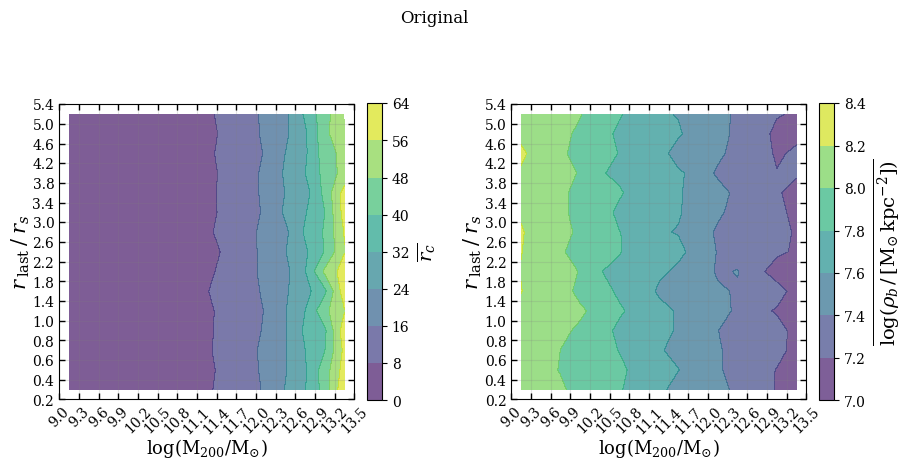

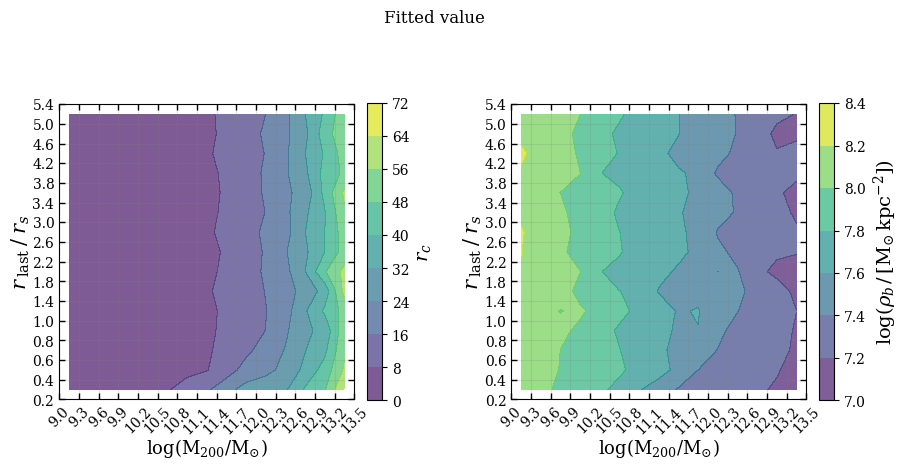

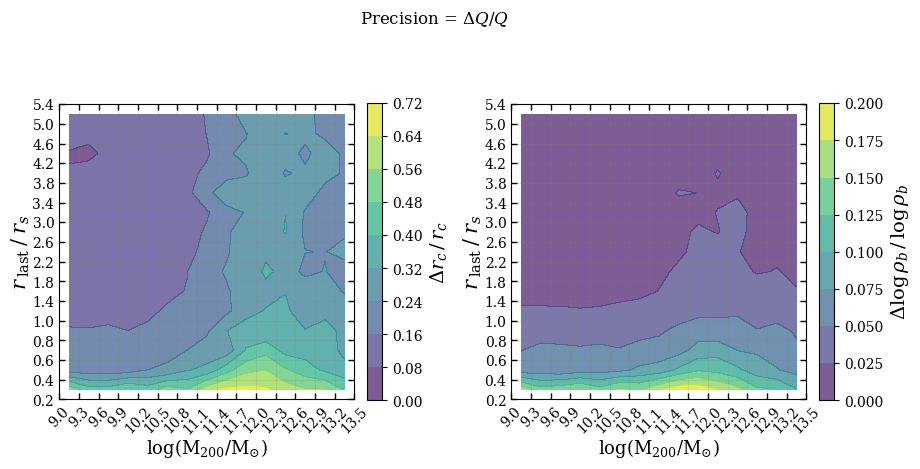

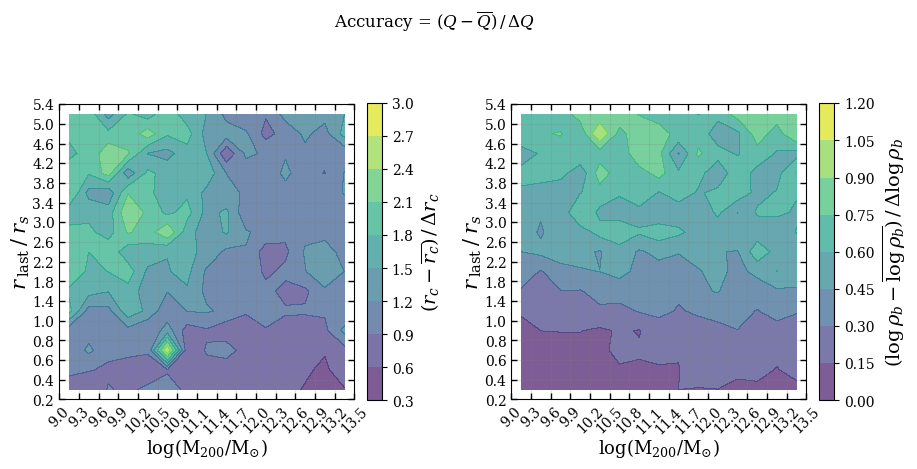

In [211]:
cmap = plt.get_cmap('viridis')
alpha = 0.7

fig,ax1,ax2 = get_axes(0.4,title = False)
axs = [ax1,ax2]
Qs = [Qrc_ori, Qrhob_ori]
labels = ['$\overline{r_c}$',
          r'$\overline{\mathrm{log}(\rho_b\,/\,[\mathrm{M_{\odot}\,kpc^{-2}}])}$']
for i in range(2):
    ax = axs[i]
    cn = ax.contourf(LM,RN,Qs[i],cmap = cmap ,alpha = alpha)
    cb = fig.colorbar(cn, ax = ax, fraction = 0.046, pad =0.04)
    cb.set_label(labels[i],size = 14)
plt.suptitle('Original')
    
fig,ax1,ax2 = get_axes(0.4,title = False)
axs = [ax1,ax2]
Qs = [Qrc_fit, Qrhob_fit]
labels = ['$r_c$',r'$\mathrm{log}(\rho_b\,/\,[\mathrm{M_{\odot}\,kpc^{-2}}])$']
for i in range(2):
    ax = axs[i]
    cn = ax.contourf(LM,RN,Qs[i],cmap = cmap ,alpha = alpha)
    cb = fig.colorbar(cn, ax = ax, fraction = 0.046, pad =0.04)
    cb.set_label(labels[i],size = 14)
plt.suptitle('Fitted value')
    
    
fig,ax1,ax2 = get_axes(0.4,title = False)
axs = [ax1,ax2]
Qs = [Qrc_pre, Qrhob_pre]
labels = ['$\Delta r_c\,/\,r_c$', r'$\Delta \mathrm{log}\,\rho_b\,/\,\mathrm{log}\,\rho_b$']
for i in range(2):
    ax = axs[i]
    cn = ax.contourf(LM,RN,Qs[i],cmap = cmap ,alpha = alpha)
    cb = fig.colorbar(cn, ax = ax, fraction = 0.046, pad =0.04)
    cb.set_label(labels[i],size = 14)
plt.suptitle('Precision = $\Delta Q/Q$')

fig,ax1,ax2 = get_axes(0.4,title = False)
axs = [ax1,ax2]
Qs = [Qrc_del, Qrhob_del]
labels = ['$(r_c - \overline{r_c})\,/\,\Delta r_c$',
          r'$(\mathrm{log}\,\rho_b - \overline{\mathrm{log}\,\rho_b})\,/\,\Delta \mathrm{log}\,\rho_b$']
for i in range(2):
    ax = axs[i]
    cn = ax.contourf(LM,RN,Qs[i],cmap = cmap ,alpha = alpha)
    cb = fig.colorbar(cn, ax = ax, fraction = 0.046, pad =0.04)
    cb.set_label(labels[i],size = 14)
plt.suptitle('Accuracy = $(Q - \overline{Q})\,/\,\Delta Q$')

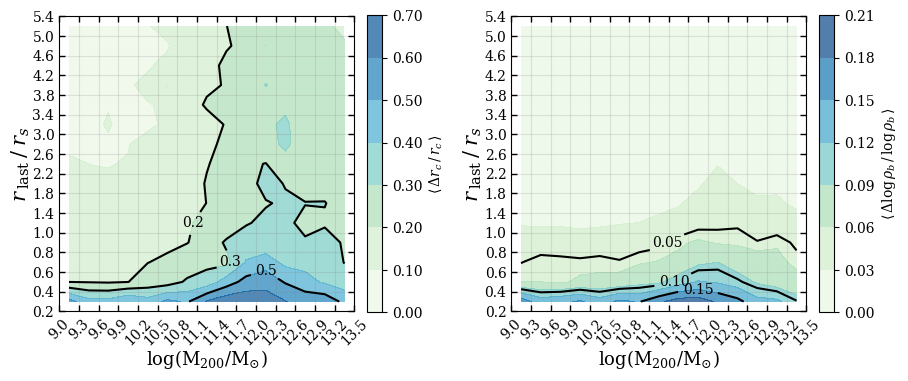

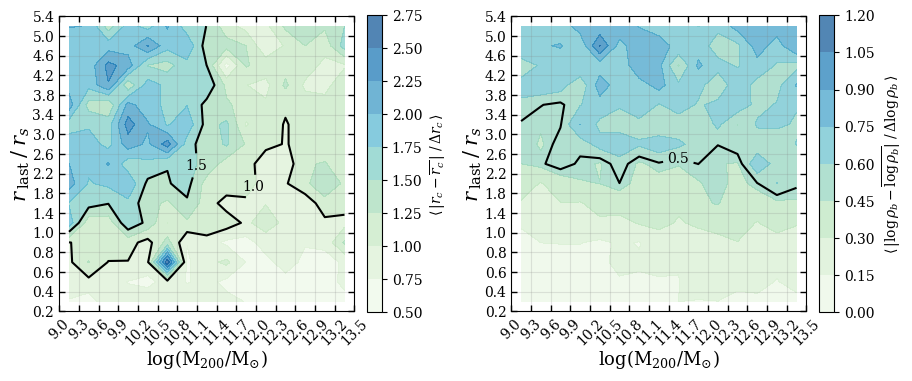

In [15]:
fig,ax1,ax2 = get_axes(0.4,title = False)
axs = [ax1,ax2]
Qs = [Qrc_pre,Qrhob_pre]
lev = [[0.2,0.3,0.5],[0.05,0.1,0.15]]
levels = [[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7],
          np.arange(0,0.24,0.03)]
vmax = [0.7,0.2]
cbs = [r'$\langle\,\Delta r_c\,/\,r_c\,\rangle$',
       r'$\langle\,\Delta \mathrm{log}\,\rho_b\,/\,\mathrm{log}\,\rho_b\,\rangle$']
cmap = 'GnBu'
alpha = 0.7
for i in range(2):
    ax = axs[i]
    cn = ax.contourf(LM,RN,Qs[i],cmap = plt.get_cmap(cmap),
                     alpha = alpha,levels = levels[i],vmin = 0,vmax = vmax[i])
    cb = fig.colorbar(cn,ax = ax,fraction = 0.046,pad = 0.04,format = '%.2f')
    cb.set_label(cbs[i],size = 10)
    cb.set_ticks(cn.levels)
    cn = ax.contour(LM,RN,Qs[i],levels = lev[i],colors = 'k')
    cn = Delsmall(cn,2)
    clabels = cn.clabel()
    for cl in clabels:
        cl.set_rotation(0)
plt.savefig('../Output/reliability/Bry_rc_rhob_percentage_error.pdf',bbox_inches = 'tight',dpi = 300)
    
fig,ax1,ax2 = get_axes(0.4,title = False)
axs = [ax1,ax2]
Qs = [Qrc_del,Qrhob_del]
levels = [[0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50],
          [0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.50,3.00]]
levels = [8,8]
lev = [[1,1.5],[0.5,1.]]
cbs = [r'$\langle\,|r_c-\overline{r_c}\,|\,\,/\,\Delta r_c\,\rangle$',
       r'$\langle\,|\mathrm{log}\,\rho_b-\overline{\mathrm{log}\,\rho_b}|\,\,/\,\Delta \mathrm{log}\,\rho_b\,\rangle$']
manuals = [[(6,7),(9,8)],[(8,5)]]
for i in range(2):
    ax = axs[i]
    cn = ax.contourf(LM,RN,Qs[i],cmap = plt.get_cmap(cmap),alpha = alpha,levels = levels[i])
    cb = fig.colorbar(cn,ax = ax,fraction = 0.046,pad = 0.04,format = '%.2f')
    cb.set_ticks(cn.levels)
    cb.set_label(cbs[i],size = 10)
    cn = ax.contour(LM,RN,Qs[i],levels = lev[i],colors = 'k')
    Delsmall(cn,4)
    clabels = ax.clabel(cn, inline = True, colors = 'k', fontsize = 10, manual = manuals[i])
    for cl in clabels:
        cl.set_rotation(0)
plt.savefig('../Output/reliability/Bry_rc_rhob_no_of_sigmas.pdf',bbox_inches = 'tight',dpi = 300)

In [17]:
def relc(orc,rc,erc,orhob,rhob,erhob,rs,pc,dc):
    if (erc/rc <= pc) and (erhob/rhob <= pc):
        if ((rc-orc)/erc <= dc) and ((rhob-orhob)/erhob <= dc):
                ri = 1
        else:
            ri = 0
    else:
        ri = 0
    return ri
        
def Relc(gdict, Ngals, pc, dc, models = ['S']):
    R = np.zeros([15,15,Ngals])
    for lm_i in range(15):
        for rn_i in range(15):
            for model in models:
                for i in range(Ngals):
                    gal = '%i_%i_%s_gal_%i'%(lm_i,rn_i,model,i)
                    rc,erc = gdict[gal]['core_fit']['r1']
                    rhob,erhob = gdict[gal]['core_fit']['rhob']
                    orc = gdict[gal]['original']['r1']
                    orhob = gdict[gal]['original']['rhob']
                    rs = gdict[gal]['core_fit']['rs'][0]
                    ri = relc(orc,rc,erc,orhob,rhob,erhob,rs,pc,dc)
                    R[lm_i,rn_i,i] = ri
    return np.mean(R,axis = 2)

In [18]:
R1 = Relc(bry, Ngals = 50, pc = 0.3, dc = 2)
R2 = Relc(bry, Ngals = 50, pc = 0.2, dc = 1)

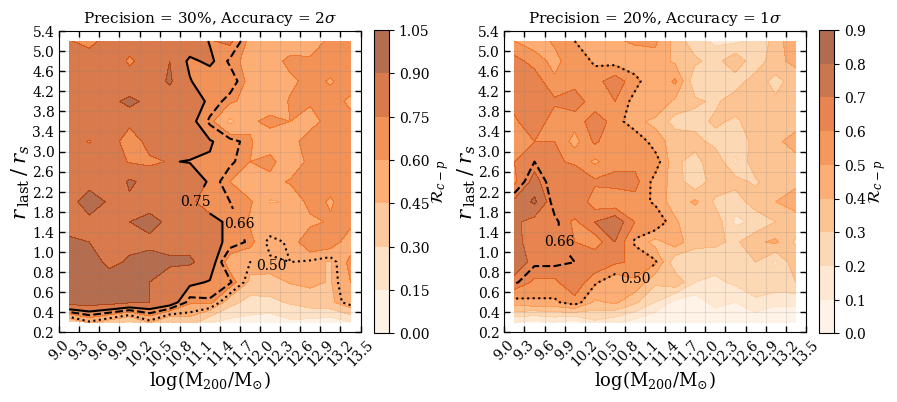

In [19]:
fig,ax1,ax2 = get_axes(0.35,title = False)
axs = [ax1,ax2]
Rs = [R1,R2]
levels = [8,8]
lev = [[0.5,0.66,0.75],[0.5,0.66,0.75]]
titles = ['Precision = 30%, Accuracy = 2$\sigma$',
          'Precision = 20%, Accuracy = 1$\sigma$']
manuals = [[(6,8),(9,9),(10,11)],[(2,10),(6,12)]]
ls = [':','--','-']
for i in range(2):
    ax = axs[i]
    cn = ax.contourf(LM,RN,Rs[i],levels = levels[i],cmap = plt.get_cmap('Oranges'),alpha = 0.7)
    cb = fig.colorbar(cn, ax = ax, fraction = 0.046, pad = 0.04)
    cb.set_label('$\mathcal{R}_{c-p}$',size = 12,labelpad = 0.2)
    cn = ax.contour(LM,RN,Rs[i],colors = 'k',levels = lev[i],linestyles = ls)
    cn = Delsmall(cn,4)
    clabels = ax.clabel(cn,inline = True, fontsize = 10, manual = manuals[i])
    for cl in clabels:
        cl.set_rotation(0)
    ax.set_title(titles[i],size = 11, fontname = 'serif')
plt.savefig('../Output/reliability/Bry_reliabiilty_core_params.pdf',bbox_inches = 'tight',dpi = 300)

In [419]:
reliability = json.load(open('../Output/reliabilities.json','r'))

In [422]:
reliability['Relcp_1'] = R1.tolist()
reliability['Relcp_2'] = R2.tolist()

In [423]:
json.dump(reliability,open('../Output/reliabilities.json','w'),indent = 2)